In [43]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

In [50]:
def niche_model(S, beta):
    # sorted array of length = species number
    n = np.sort(rng.uniform(low = 0, high = 1, size = S))
    r = np.zeros(S)
    
    # set up alpha and beta params and loop through and add diet range values to r array
    aleph = 1
    b = beta
    for i in range(0,S):
        # random number generation from beta dist
        x = rng.beta(aleph, beta)
        r[i] = n[i]*x
    
    # Plotting Prey Range vs. Niche Value of each species
    plt.plot(n,r)
    plt.ylabel("Diet Range")
    plt.xlabel("Niche Value")
    plt.show()
    
    
    
    return adj_matrix

In [45]:
S = 5
C = 0.02
n = np.sort(rng.uniform(low = 0, high = 1, size = S))
r = np.zeros(S)

In [46]:
n

array([0.13182896, 0.36856893, 0.77708763, 0.9380234 , 0.95773182])

In [47]:
aleph = 1
beta = (1/C)-1
for i in range(0,S):
    print(rng.beta(aleph,beta))

0.01479302119199621
0.05112782114186703
0.027647958953155225
0.002417303399669631
0.020132922275750847


In [48]:
for i in range(0,S):
        x = rng.beta(aleph, beta)
        r[i] = n[i]*x
r

array([0.00239559, 0.02033304, 0.05795272, 0.00953944, 0.03054543])

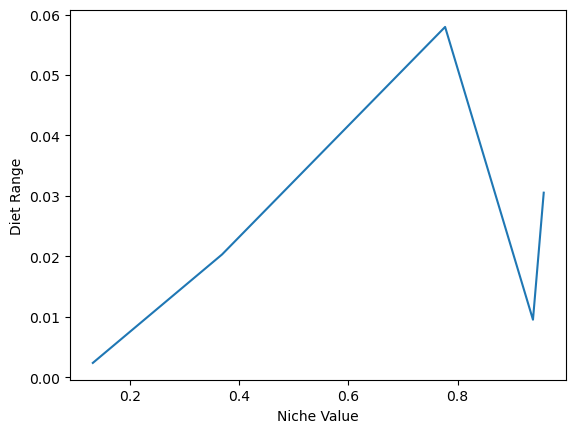

In [49]:
plt.plot(n,r)
plt.ylabel("Diet Range")
plt.xlabel("Niche Value")
plt.show()